0.062000 | 0.96533203125
0.125000 | 0.94482421875
0.250000 | 0.87939453125
0.500000 | 0.764892578125
1.000000 | 0.55419921875
2.000000 | 0.244384765625
4.000000 | 0.0595703125


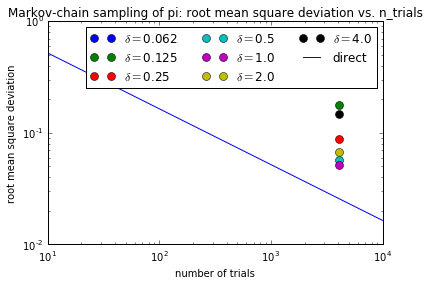

In [16]:
%matplotlib inline
import matplotlib as mpl
mpl.use('Agg')
import random, math, pylab

def markov_pi(N, delta):
    x, y = 1.0, 1.0
    n_hits, n_accepted = 0, 0
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
            n_accepted += 1
        if x**2 + y**2 < 1.0:
            n_hits += 1
    return n_hits, n_accepted

n_runs = 500
for delta in [0.062, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]:
    n_trials_list = []
    sigmas = []
    for poweroftwo in range(12, 13):
        n_trials = 2 ** poweroftwo
        sigma = 0.0
        for run in range(n_runs):
            n_hits, n_accepted = markov_pi(n_trials, delta)
            pi_est = 4.0 * n_hits / float(n_trials)
            sigma += (pi_est - math.pi) ** 2
        sigmas.append(math.sqrt(sigma/(n_runs)))
        n_trials_list.append(n_trials)
        print '{0:4f} | {1}'.format(delta, float(n_accepted)/n_trials)
    pylab.plot(n_trials_list, sigmas, 'o', ms = 8, label = '$\delta = $' + str(delta))

pylab.xscale('log')
pylab.yscale('log')
pylab.xlabel('number of trials')
pylab.ylabel('root mean square deviation')
pylab.plot([10,10000],[1.642 / math.sqrt(10.0), 1.642 / math.sqrt(10000.0)],
           label = 'direct')
pylab.title('Markov-chain sampling of pi: root mean square deviation vs. n_trials')
pylab.legend(loc='upper right', ncol=3)
pylab.savefig('markov_sampling_rms_deviation.png')
pylab.show()